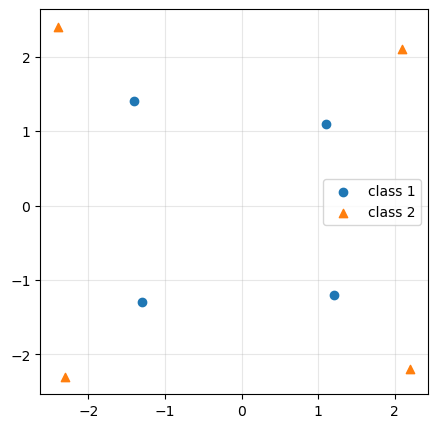

[array([[ 6.72417423, -3.47725451,  7.27006715],
       [-0.06774503, -4.59098441,  0.21211391]]), array([[ 14.66807645, -14.7282736 ],
       [ -2.71311847,   2.21643215],
       [-15.20136315,  15.30165114]])]
[array([ 12.57874722, -16.56797693, -11.89738759]), array([-7.02955941,  7.05108413])]
0.00798724411958303
[0 1]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           0       1.00      1.00      1.00         4

   micro avg       1.00      1.00      1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8
 samples avg       1.00      1.00      1.00         8



In [ ]:
# 利用 Artificial Neural Network 作為模型進行非線性二類別分類



# 基本概念 : 

# 不同層都有神經節點，總共有輸入層、隱藏層、輸出層

# 輸入層就是特徵總數的節點數量，輸出層就是分類總數的節點數量，中間隱藏層則是可以 n 層，每層有不同總數的節點 ( 看訓練成效好壞決定 )

# 訓練方式基本上就是 Linear + Logistic + Gradient Descend，Linear 的基本模型，Logistic 的轉換函數，還有結果用 Gradient Descent 慢慢降低運算結果和分類實際標籤差距 MSE 

# 輸出層會用 N 個節點向量來表示，例如三類就是 [1,0,0]、[0,1,0]、[0,0,1] 的三個節點來表示，因為要區分成每個類別又要是 Sigmoid 函數區間，因此分成 N 類個 1，如此才能計算

# 基本上就是在蒜每一類 Sigmoid 轉換出來的機率和真實的 y 標籤是 0 或 1 的機率來做差距的 MSE，所以都是機率的計算

# 兩類的區分通常只要一個輸出層的節點即可，就像 Logistic Regression 只會輸出一個機率結果，而不會輸出另一邊的機率，因為可以直接推得

# 通常模型或軟體對二分類的情況下的 y 只會用純數字表示，也就是 0 或 1，因為只有兩類，可以推得另一邊機率，但三類以上就是用向量表示，例如 [1,0,0] 這樣

# 這個在 x 也是一樣，類別變數如果是三類以上，軟體或模組會自動把 x 的文字標籤或 0 , 1 , 2 數字標籤轉成平等的向量表示，或自己手動轉換，這樣才能進行數學運算



from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix , classification_report , ConfusionMatrixDisplay
import numpy
import matplotlib.pyplot as plt


# 1. 假設非線性資料集

x = [[1.1,1.1],[1.2,-1.2],[-1.3,-1.3],[-1.4,1.4],[2.1,2.1],[2.2,-2.2],[-2.3,-2.3],[-2.4,2.4]]

# y 用向量表示，但其實可以不需要，因為只是兩類

y = [[1,0],[1,0],[1,0],[1,0],[0,1],[0,1],[0,1],[0,1]]

# 可以畫圖看出來其實是非線性資料

plot_x = numpy.array(x)

plt.figure(figsize=(5,5))

plt.scatter(plot_x[0:4,0],plot_x[0:4,1],marker="o",label="class 1")
plt.scatter(plot_x[4:8,0],plot_x[4:8,1],marker="^",label="class 2")

plt.grid(alpha=0.3)
plt.legend()

plt.show()


# 2. 利用 ANN 來建立模型

# 要先給定層數和節點數，例如 (2,) 表示一層兩個節點，(2,3) 表示兩層，一層兩個節點、一層三個節點

# 其他選擇性可以設定的有 activitation function 轉換函數 ( 預設 relu )、solver 的 Gradient Descent 方法 ( 預設 adam )、random_state 隨機總子、max_iter 最大試行數

model = MLPClassifier(activation="logistic",hidden_layer_sizes=(3,),solver="lbfgs")
model.fit(x,y)


# 3. 產生訓練參數

# 基本上參數就是 y = ax + b 的 a 和 b，只是會因為每一層到下一層的對應節點數量不見得一樣，所以表示的矩陣會形狀不同

# 例如這邊輸入層到隱藏層是 2 對 3 ，所以就是一個節點對三個節點，又因為有兩個，所以就是兩列，可以把列想成前一層節點總數，行是下一層節點總數，所以會產生 2 * 3 個 a，以及 3 個 b

# 而因為還有隱藏層到輸出層，所以就是 3 對 2，三個節點各對兩個節點，所以就是 3 列 2 行，因此 coef 的輸出就會是兩個元素的 list，一個是 2 * 3 的矩陣，一個是 3 * 2 的矩陣

print(model.coefs_)

print(model.intercepts_)

# 可以看最佳的 MSE 結果，注意是 loss 不是 best loss

print(model.loss_)


# 4. 預測 y 並衡量分類效果

y_prediction = model.predict(x)

report = classification_report(y,y_prediction,target_names=["0","1"])

print(report)

# confusion matrix 不支援向量表達，因此要改成單一數字，其實一般資料即便是多分類，y 也是用一個文字標籤或數字代碼即可，軟體或模組會自己轉換成向量，結果也會是一個文字或數字表達

# matrix = confusion_matrix(y,y_prediction)

# print(matrix)



